# Figures 10 and 11

Consider the family of bidirectional payment streams $\{ (\tau_n^\lambda, \Delta_n^\lambda)_{n \geq 1} \}_{\lambda > 0}$ described in Section 5.3.2.

## Fixed $\lambda$

The code for computing the minimal cost, optimal deposits and reset thresholds for $\lambda = 1/10$ is given below:

In [4]:
import numpy as np
from scipy.optimize import root
from dataclasses import dataclass
import matplotlib.pyplot as plt
import import_ipynb
import GeneralMethod  # Call functions from GeneralMethod without duplicating code

In [116]:
lam = 1/10

def I_mix(x, y, p, lam_A, lam_B):
    if x >= 0:
        return p * (np.exp(-lam_B * x) - np.exp(-lam_B * y))
    elif y <= 0:
        return (1 - p) * (np.exp(lam_A * y)-np.exp(lam_A * x))
    else:
        return 1 - (1 - p) * np.exp(lam_A * x) - p * np.exp(-lam_B * y)

def I(x,y):
    return I_mix(x, y, 1/2, lam/2, lam) # On average, Alice's payment size is double Bob's and they pay at the same rate

In [118]:
params = GeneralMethod.PaymentParams(
    l_A = 200, 
    l_B = 100, 
    C = 1.0, 
    D = 2.0, 
    alpha = (2080 * lam) / (2080 * lam + 0.02), 
    n = 0.5, 
    I = I  # The function I defined above
)

# Find the optimal cost vector
optimal_cost_vector = GeneralMethod.T_n(params)
print("Optimal cost starting at zero with l_A=200 and l_B=100:", optimal_cost_vector[int(2 * params.n * params.l_A)])

Optimal cost starting at zero with l_A=200 and l_B=100: 621.5976880477607


In [56]:
# 200 + 100 + 621.5976880477607 < 950
GeneralMethod.multi_level_search(params, 50, 950, 10, 40, unidirectional=False, symmetric=False, method='hybr')

Starting coarse search with step size: 50, l_max: 950
l_A = 0, l_B = 0, V_n = 10399.999999995143
l_A = 0, l_B = 50, V_n = 2964.281662747275
l_A = 0, l_B = 100, V_n = 1841.662912446254
l_A = 0, l_B = 150, V_n = 1525.723447816208
l_A = 0, l_B = 200, V_n = 1417.3927896596017
l_A = 0, l_B = 250, V_n = 1386.0918535915075
l_A = 0, l_B = 300, V_n = 1389.4560046991642
l_A = 0, l_B = 350, V_n = 1410.5404752763197
l_A = 0, l_B = 400, V_n = 1441.5629330406844
l_A = 0, l_B = 450, V_n = 1478.5561960416603
l_A = 0, l_B = 500, V_n = 1519.342443116688
l_A = 0, l_B = 550, V_n = 1562.6465043300004
l_A = 0, l_B = 600, V_n = 1607.681769424129
l_A = 0, l_B = 650, V_n = 1653.9436688360893
l_A = 0, l_B = 700, V_n = 1701.0961938514993
l_A = 0, l_B = 750, V_n = 1748.9088633533822
l_A = 0, l_B = 800, V_n = 1797.2185030732564
l_A = 0, l_B = 850, V_n = 1845.9076739474071
l_A = 0, l_B = 900, V_n = 1894.8898081311609
l_A = 0, l_B = 950, V_n = 1944.099736359027
l_A = 50, l_B = 0, V_n = 2964.259641805671
l_A = 50, l_

(370, 80, 801.6706790871717)

Bob's reset threshold: NA
Alice's reset threshold: -332.0


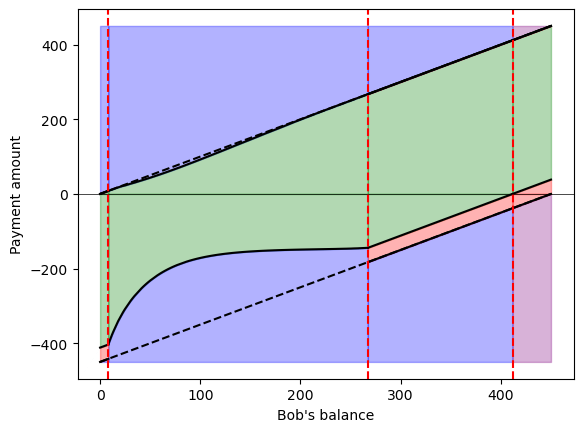

In [74]:
params.l_A = 370 # optimal l_A 
params.l_B = 80 # optimal l_B  

optimal_cost_vector = GeneralMethod.T_n(params) # Compute the corresponding optimal cost vector

GeneralMethod.Optimal_Policy(optimal_cost_vector, 5, params, unidirectional=False)

Bob_reset_threshold = params.l_B - GeneralMethod.calculate_threshold_indices(optimal_cost_vector, params.C, params.D, params.l_A, params.l_B, params.n)[0] / (2 * params.n) if params.l_B - GeneralMethod.calculate_threshold_indices(optimal_cost_vector, params.C, params.D, params.l_A, params.l_B, params.n)[0] / (2 * params.n) < params.l_B else "NA"
Alice_reset_threshold = params.l_B - GeneralMethod.calculate_threshold_indices(optimal_cost_vector, params.C, params.D, params.l_A, params.l_B, params.n)[3] / (2 * params.n) if params.l_B - GeneralMethod.calculate_threshold_indices(optimal_cost_vector, params.C, params.D, params.l_A, params.l_B, params.n)[3] / (2 * params.n) > -params.l_A else "NA"
print("Bob's reset threshold:", Bob_reset_threshold)
print("Alice's reset threshold:", Alice_reset_threshold)

Therefore, the optimal channel deposits are $l_A^* = 370$ and $l_B^* = 80$, the minimal cost is $802$, and the optimal policy is illustrated above.

## Varying $\lambda$

Varying the mean payment amount $\tfrac{1}{\lambda}$ and repeating the above analysis yields the following table:

|       $\tfrac{1}{\lambda}$       |   Minimal cost   |  Alice's optimal deposit  |  Bob's optimal deposit  |  Alice's reset threshold  |   Bob's reset threshold  |
|:--------------------------------:|:----------------:|:-----------------:|:------------------:| :------------------:| :------------------:|
|              5                   |       743        |         350       |        55         |          324         |          --      |
|              10                  |       802        |         370       |        80         |          332         |          --      |
|              20                  |       863        |         354       |        96         |          313         |          --      |
|              30                  |       866       |         280       |        120        |          260         |          --      | 
|              40                  |       828        |         220       |        120        |          220         |          --      |
|              60                  |       783        |         196       |        148        |          --          |          --      |
|              100                 |       733        |         132       |        168        |          --          |          --      |
|              150                 |       647        |         20        |        140        |          --          |          --      |
|              160                 |       624        |         0         |        120        |          --          |          --      |
|              180                 |       575        |         0         |        42         |          --          |          --      |

Spline interpolation allows us to fit a smooth curve through these points, which can then be used to estimate the minimal cost, optimal deposits and reset thresholds at intermediate values.

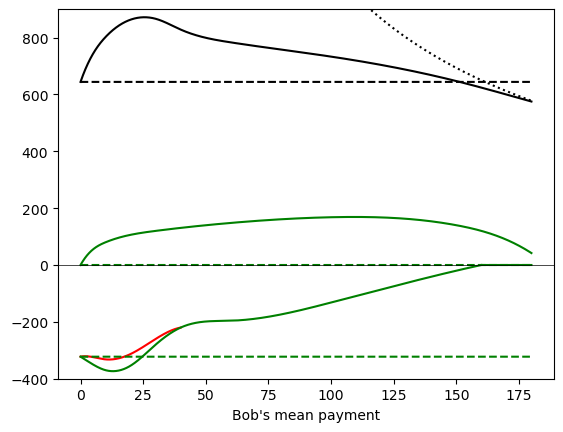

In [170]:
from scipy.interpolate import make_interp_spline

x_Alice_rt_values=np.array([0, 5, 10, 20, 30, 40])
Alice_reset_thresholds=np.array([-322.5, -324, -332, -313, -260, -220])
X_Alice_RT_Spline = make_interp_spline(x_Alice_rt_values, Alice_reset_thresholds)
X_Alice_RT_ = np.linspace(x_Alice_rt_values.min(), x_Alice_rt_values.max(), 10000)
Alice_RT_ = X_Alice_RT_Spline(X_Alice_RT_)

x_oc_values=np.array([0, 5, 10, 20, 30, 40, 60, 100, 150, 160, 180])
optimal_cost=np.array([644, 743, 802, 863, 866, 828, 783, 733, 647, 624, 575])
X_OC_Spline = make_interp_spline(x_oc_values, optimal_cost)
X_OC_ = np.linspace(x_oc_values.min(), x_oc_values.max(), 10000)
OC_ = X_OC_Spline(X_OC_)

x_Bob_oa_values=np.array([0, 5, 10, 30, 60, 100, 150, 160, 180])
Bob_optimal_allocations=np.array([0, 55, 80, 120, 148, 168, 140, 120, 42])
X_Bob_OA_Spline = make_interp_spline(x_Bob_oa_values, Bob_optimal_allocations)
X_Bob_OA_ = np.linspace(x_Bob_oa_values.min(), x_Bob_oa_values.max(), 10000)
Bob_OA_ = X_Bob_OA_Spline(X_Bob_OA_)

x_Alice_oa_values=np.array([0, 5, 10, 20, 30, 40, 60, 100, 150, 160])
Alice_optimal_allocations=np.array([-322.5, -350, -370, -354, -280, -220, -196, -132, -20, 0])
X_Alice_OA_Spline = make_interp_spline(x_Alice_oa_values, Alice_optimal_allocations)
X_Alice_OA_ = np.linspace(x_Alice_oa_values.min(), x_Alice_oa_values.max(), 10000)
Alice_OA_ = X_Alice_OA_Spline(X_Alice_OA_)

plt.plot(X_OC_, OC_, color='black', label='Optimal cost')
plt.plot(X_Alice_RT_, Alice_RT_, color='red', label='Reset threshold')
plt.plot(X_Bob_OA_, Bob_OA_, color='green', label='Optimal allocation')
plt.plot(X_Alice_OA_, Alice_OA_, color='green', label='Optimal allocation')
x = np.linspace(0.01, 180, 18000)
z = np.linspace(160.01, 180, 18000)
plt.plot(z, [0]*18000, color='green')
plt.plot(x, 40*52/(0.02 * x), color='black', linestyle='dotted')
plt.plot(x, [0]*18000, color='green', linestyle='dashed')
plt.plot(x, [-322.5]*18000, color='green', linestyle='dashed')
plt.plot(x, [644]*18000, color='black', linestyle='dashed')
plt.ylim(-400, 900)
plt.xlabel("Bob's mean payment")
plt.axhline(0, color='black', linewidth=0.5)
plt.show()